### Data Loading

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_fa = pd.read_excel("sdsu_dti.xlsx", sheet_name="FA")
data_ad= pd.read_excel("sdsu_dti.xlsx", sheet_name="AD")
data_md = pd.read_excel("sdsu_dti.xlsx", sheet_name="MD")
data_rd = pd.read_excel("sdsu_dti.xlsx", sheet_name="RD")

(data_fa.shape, data_ad.shape, data_md.shape, data_rd.shape)

((33, 51), (33, 51), (33, 51), (33, 51))

In [35]:
# Defining my features 

arr2 = pd.concat([data_ad , data_fa , data_md , data_rd]  , axis = 1 )
column_names = range(200)
arr2.drop("subid", axis=1, inplace=True)
arr2 = arr2.set_axis(column_names, axis='columns')

X = arr2.values

### Visualization? 

**Issue** How to visualise 200 Dimensional data?
- Reduce Dimensions: Use techniques like PCA or t-SNE to reduce dimensions.
- Plot Pairs: Create scatter plots for feature pairs to spot patterns.
- Heatmap: Display correlation matrix as a heatmap.
- Parallel Coordinates: Plot multiple features on parallel axes.
- Box Plots: Show feature distributions using box plots.
- Histograms: Display frequency distribution of individual features.
- Violin Plots: Combine box plots and kernel density plots.
- Feature Importance: Use bar plots to show feature importance.
- Interactive Tools: Utilize tools like Plotly for dynamic visualizations.


### K-Means clustering for Selecting features

First let's check the Silhouette Plot for multiple clsuter values.
But problem withit is that multiple features out of 200 columns could be just craeting a noise, decreasing the value of our true Silhouette pro hero.
So we'll try to take pairs of features, and then calculate the Silhouette score for each pair, for possible values of clusters, and find which combination of feature1 + feature2 + k_value is giving higher Silhouette score, and also visualize the distribution of the Silhouette score, to actually see how many of them are our true hero.

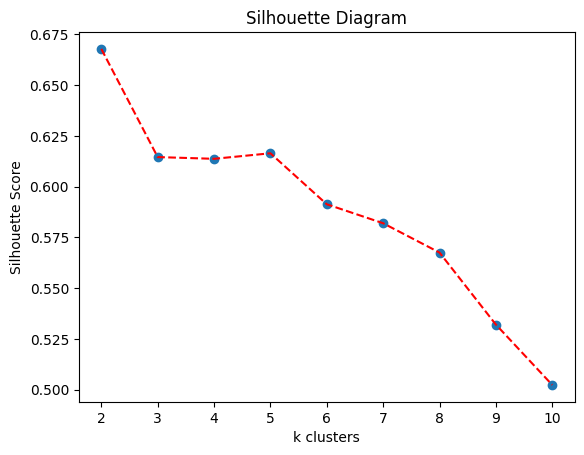

In [10]:
# Selecting the optimum number of clusters 
from sklearn.metrics import silhouette_score 
from sklearn.cluster import KMeans 

lis = []
lis_num = []

for i in range(2,11) :
    kmeans1 = KMeans(n_clusters = i, n_init=50)
    kmeans1.fit(X)
    lis.append(silhouette_score(X, kmeans1.labels_))
    lis_num.append(i)
    
plt.plot(lis_num ,lis , "r--")
plt.scatter(lis_num, lis)
plt.xlabel("k clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Diagram")
plt.show()    

Optimum no. of clusters, where Silhouete scores maximum, seems to be 2 ,3 or 5. But, it can be lying, because there might be potential noisy features, just downgrading the score of a particular K.


In [91]:
import numpy as np 

out = -1 
max_list = []               
distribution = []           # 


for k in range(2 , 6) :
    for i  in range( 1, 200) :
        for j in range( i+1, 200) :
            
            f1 = X[ : , i : i+1] 
            f2 = X[ : , j : j+1]
            
            
            f0 = np.concatenate((f1 , f2) , axis=1 )
           
            kmeans2 = KMeans(n_clusters = k  , init = "random" , n_init = 3 )
            kmeans2.fit(f0) 
            distribution.append([out, i, j, k])
            # label = kmeans2.predict([[0.89 , 0.03]])
            #print(i," ", j," ", k , "silhouette score=" , silhouette_score( f0 , kmeans2.labels_))
            if(silhouette_score( f0 , kmeans2.labels_) > out ):
                out = silhouette_score( f0 , kmeans2.labels_)
                print(" ",i," ", j," ", k ,out)
                max_list.append((out, i, j, k))
    print(f"Len of dsitrbuiton till {k}-th cluster: ", len(distribution))

  1   2   2 0.5117991915238325
  1   3   2 0.5118444468789758
  1   4   2 0.5962377038698111
  1   51   2 0.6686832273995914
  2   3   2 0.7368644391034688
  3   5   2 0.7489903557122445
  3   77   2 0.761158952429249
  32   37   2 0.7754252929287997
  32   129   2 0.7914935190232847
  33   59   2 0.8085541009982
  38   59   2 0.8185944390166758
  38   130   2 0.8546473336752073
  125   130   2 0.8555535911609293
Len of dsitrbuiton till 2-th cluster:  19701
Len of dsitrbuiton till 3-th cluster:  39402
Len of dsitrbuiton till 4-th cluster:  59103
Len of dsitrbuiton till 5-th cluster:  78804


In [134]:
dist_np = np.array(distribution)
dist_np.shape

(78804, 4)

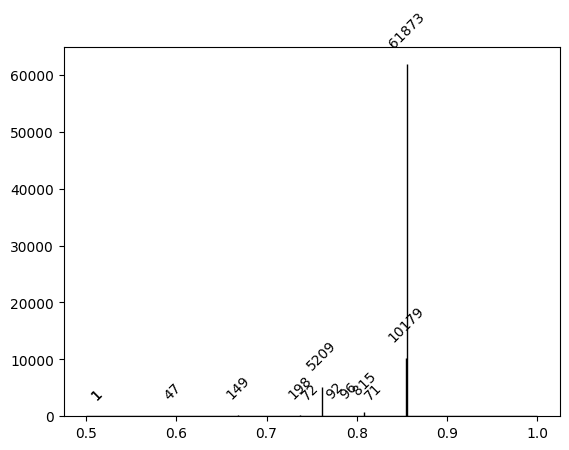

In [151]:
import matplotlib.pyplot as plt

n, bins, patches = plt.hist(dist_np[:, 0], color='lightgreen', ec='black', bins=10000, range=[0.5, 1])

for i, (patch, frequency) in enumerate(zip(patches, n)):
    if frequency > 0:
        height = patch.get_height()
        plt.annotate(f'{int(frequency)}', xy=(patch.get_x() + patch.get_width() / 2, height),
                     xytext=(0, 10),rotation=45, textcoords='offset points',  # Increase the y-coordinate here
                     ha='center', va='bottom')
plt.show()


When setting the bin size (1-0.5)/10000 = 5e-05, we get above plot. It shows that we have 61873 such pairs, which is making Silhouette score near maximum

### K-means Clustering (Trial)

Let's get some visualizations, to get some insights.

In [11]:
# K - Means Clusatering 

from sklearn.cluster import KMeans 
kmeans = KMeans (n_clusters = 2 , n_init = 3)
predict = kmeans.fit_predict(X)

In [15]:
silhouette_score(X, kmeans.labels_)

0.6677653558054968

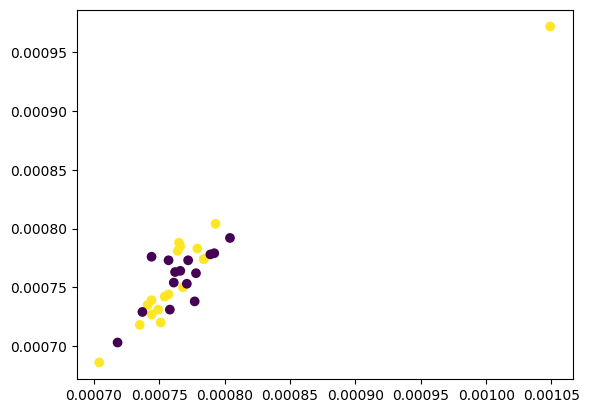

In [14]:
i=130
j=125

plt.scatter( X[: 34 , i:i+1] , X[:34 , j:j+1] , c = predict[:34] , cmap = "viridis")
plt.show()

In [ ]:
#Since the Dataset is somewhat large = 33*50*4  , hence , we also tried taking results from Mini Batch K Means Clustering Algo.

from sklearn.cluster import MiniBatchKMeans 
mini_batch = MiniBatchKMeans (n_clusters = 5 , n_init = 3)
mini_batch.fit (X)

MiniBatchKMeans(n_clusters=5, n_init=3)

### Heirarchical Clustering - Agglomerative Clustering (Trial)

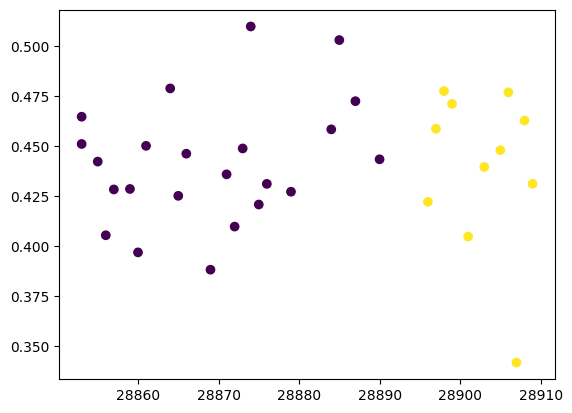

In [ ]:
# Heirarchichal Clustering 


# Agglomerative CLustering 

from sklearn.cluster import AgglomerativeClustering s

agg_cluster = AgglomerativeClustering()

labe = agg_cluster.fit_predict(X1)


# showing the clusters based on first 2 features of fa 

plt.scatter(X[:34 , 0] , X[ :34 , 1] , c= labe[:34] , cmap = "viridis" )
plt.show()


### Using PCA and analyzing its implications

In [81]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


sc = StandardScaler()
X_standard = sc.fit_transform(X)        # preprocessing 

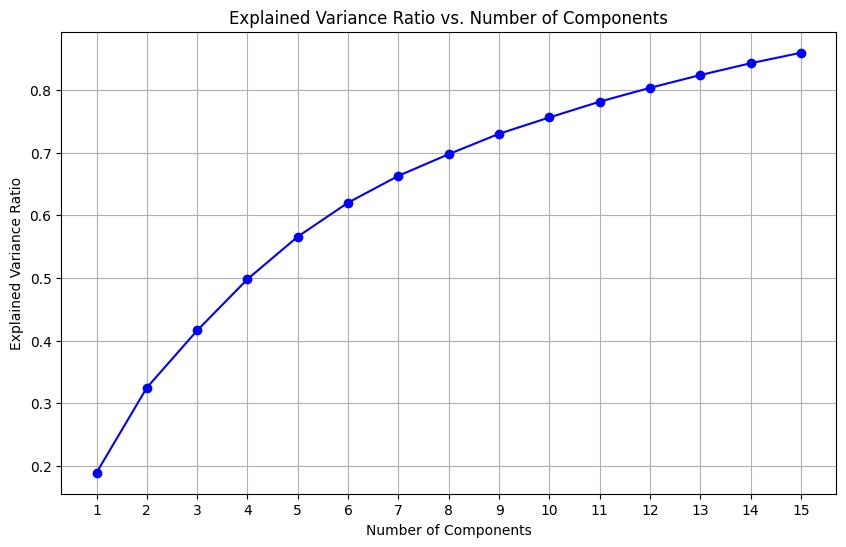

In [82]:
n_components_range = range(1, 16)  # Testing from 1 to 15 components
explained_variance_ratios = []

for n in n_components_range:
    pca = PCA(n_components=n)
    X_ncomponents = pca.fit_transform(X_standard)
    explained_variance_ratios.append(pca.explained_variance_ratio_.sum())

# Create a plot to visualize the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(n_components_range, explained_variance_ratios, marker='o', linestyle='-', color='b')
plt.title('Explained Variance Ratio vs. Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.xticks(n_components_range)
plt.show()


##### Choosing n_components = 10 for explaining 75.61% of total variance
(so X_ncomponents.shape = (33,10))

In [83]:
pca = PCA(n_components=10)

X_ncomponents = pca.fit_transform(X_standard)
pca.explained_variance_ratio_.sum() # summation of top n_component number of eigen values 

0.7560703911120742

### Plotting for Silhoutte analysis

For n_clusters = 2 The average silhouette_score is : 0.17405977627456867
For n_clusters = 3 The average silhouette_score is : 0.10547904938068998
For n_clusters = 4 The average silhouette_score is : 0.1292632618156798
For n_clusters = 5 The average silhouette_score is : 0.1250036413861259
For n_clusters = 6 The average silhouette_score is : 0.1193553689026728


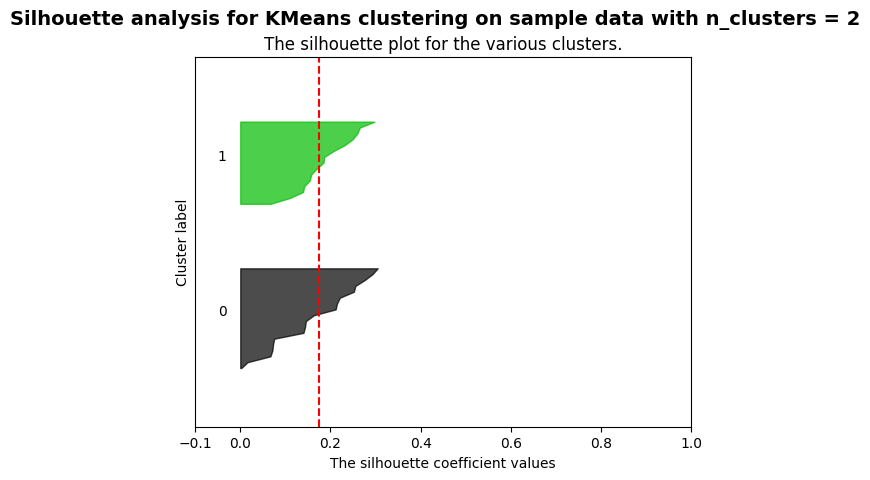

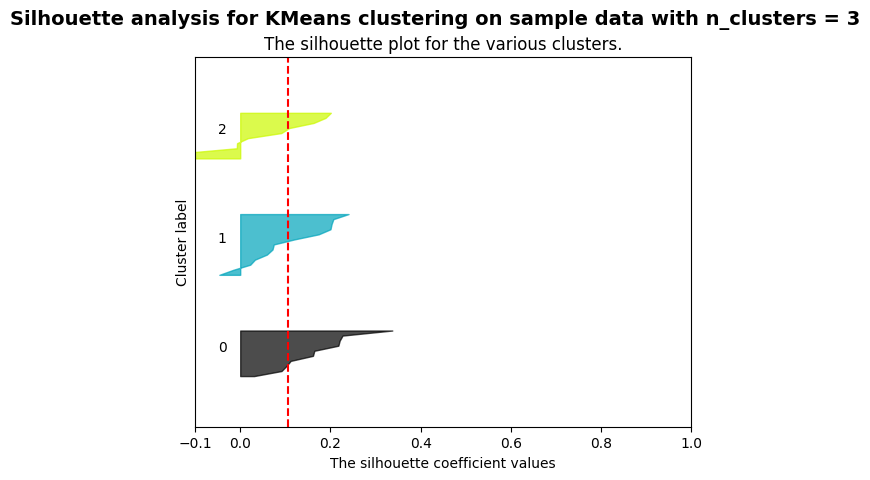

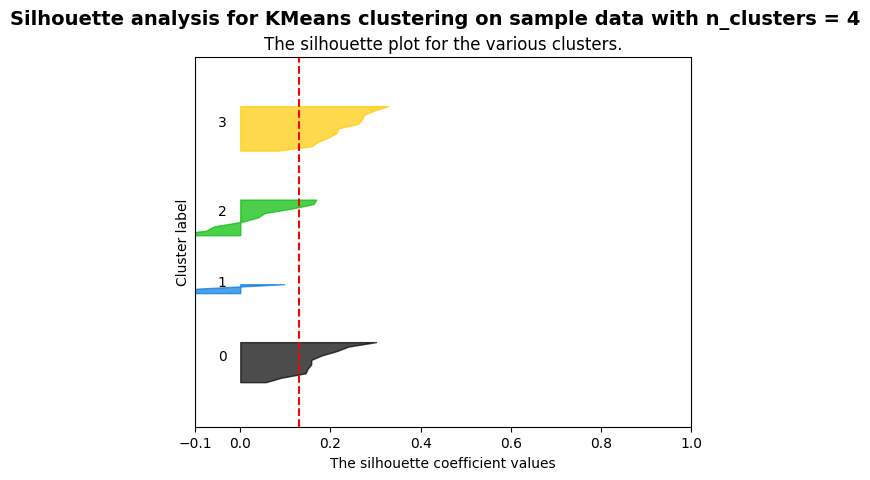

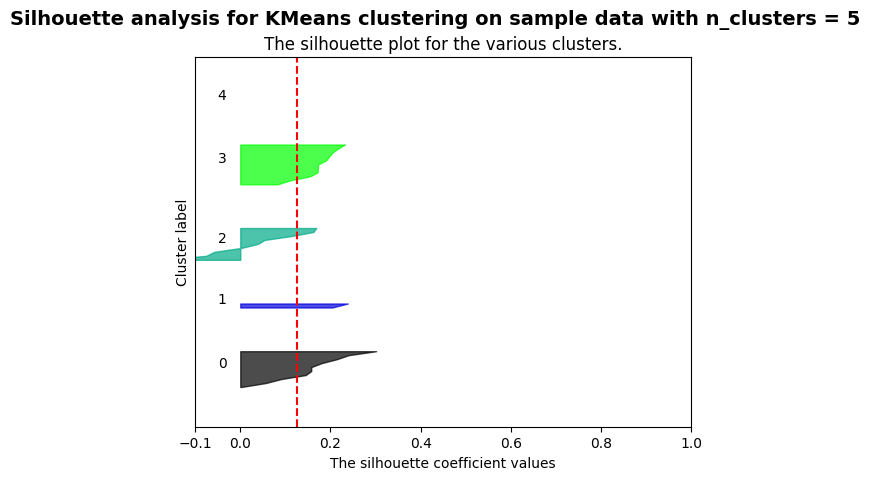

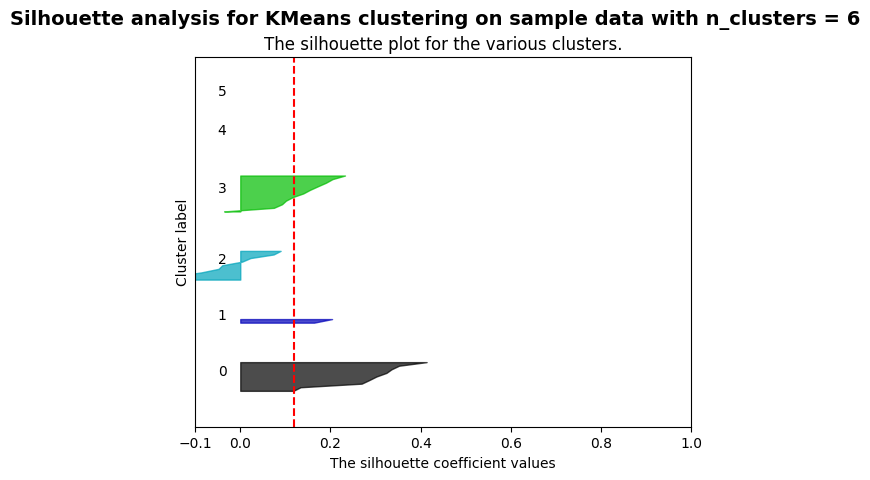

In [93]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X = X_ncomponents

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1,1)
    # fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    # colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    # ax2.scatter(
    #     X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    # )

    # Labeling the clusters
    # centers = clusterer.cluster_centers_
    # # Draw white circles at cluster centers
    # ax2.scatter(
    #     centers[:, 0],
    #     centers[:, 1],
    #     marker="o",
    #     c="white",
    #     alpha=1,
    #     s=200,
    #     edgecolor="k",
    # )

    # for i, c in enumerate(centers):
    #     ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    # ax2.set_title("The visualization of the clustered data.")
    # ax2.set_xlabel("Feature space for the 1st feature")
    # ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

### From above we can see, 2 clusters are great!